# Business Understanding

## Project Domain

Proyek ini berada dalam domain Smart City & Transportation Analytics. Sistem transportasi modern membutuhkan data dan model prediktif untuk meminimalisir kemacetan, merencanakan infrastruktur, serta mengoptimalkan alokasi sumber daya seperti petugas lalu lintas dan papan informasi jalan.

## Problem Statements

Pemerintah kota atau penyedia layanan transportasi menghadapi kesulitan dalam:

Memprediksi kondisi lalu lintas (Traffic Situation) di waktu mendatang secara akurat.

Mengintegrasikan faktor-faktor cuaca, waktu, dan hari ke dalam sistem prediksi.

Mengambil keputusan real-time untuk mengatur lalu lintas, terutama pada jam-jam sibuk.



## Goals

Tujuan proyek ini adalah:

Membangun model klasifikasi menggunakan Artificial Neural Network (ANN) untuk memprediksi tingkat lalu lintas (misal: Lancar, Padat, Macet) berdasarkan data historis.

Memberikan sistem pendukung keputusan yang dapat membantu pihak berwenang mengelola lalu lintas secara lebih efisien.


## Solution Statements

Solusi teknis meliputi:

Pra-pemrosesan data: encoding kategori (Day of the week, Traffic Situation), normalisasi fitur numerik.

Pelatihan model ANN untuk klasifikasi multiclass.

Evaluasi performa model menggunakan akurasi, confusion matrix, dan classification report.

Integrasi model ke aplikasi (misalnya Streamlit) untuk penggunaan interaktif oleh petugas lapangan atau sistem dashboard.

# Data Understanding

## Import data dari kaggle

In [38]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zidansabillahusain","key":"6ccd99527789fa2137e2c8273ea9e47b"}'}

In [39]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [40]:
!kaggle datasets download -d hasibullahaman/traffic-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset
License(s): other


In [41]:
!mkdir traffic-prediction-dataset
!unzip traffic-prediction-dataset.zip -hasibullahaman/traffic-prediction-dataset
!ls traffic-prediction-dataset

Archive:  traffic-prediction-dataset.zip
caution: filename not matched:  -hasibullahaman/traffic-prediction-dataset


## Import Library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


## Exploratory Data Analysis

In [5]:
df = pd.read_csv("/content/sample_data/Traffic.csv")


In [6]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [8]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


<Axes: xlabel='Day of the week', ylabel='Count'>

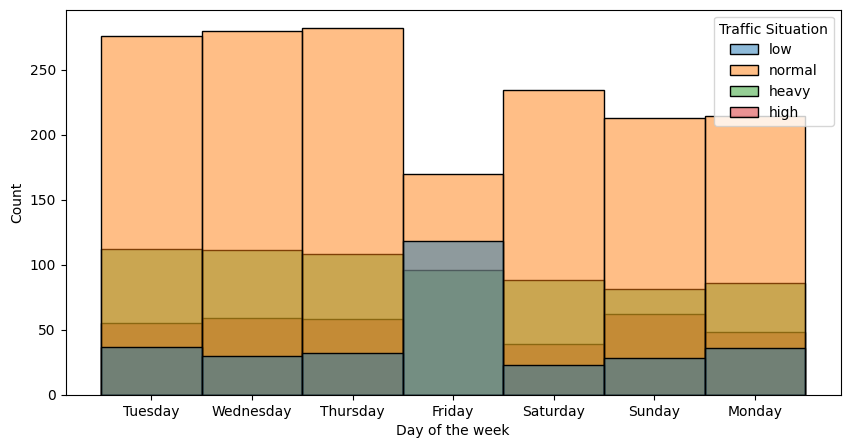

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

_, ax = subplots(figsize=(10, 5))
sns.histplot(data=df, x="Day of the week", hue="Traffic Situation")

<Axes: xlabel='Date', ylabel='Count'>

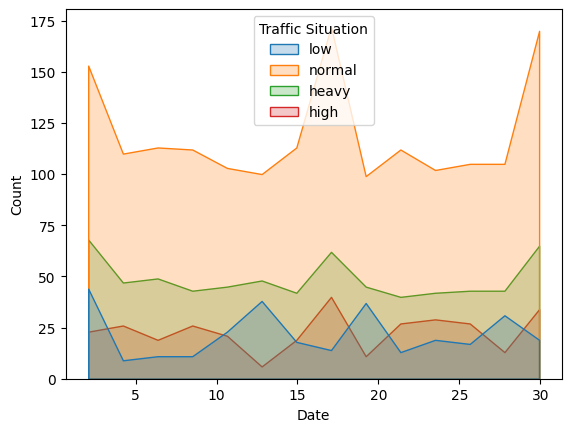

In [14]:
sns.histplot(df, x="Date", hue="Traffic Situation", element="poly")

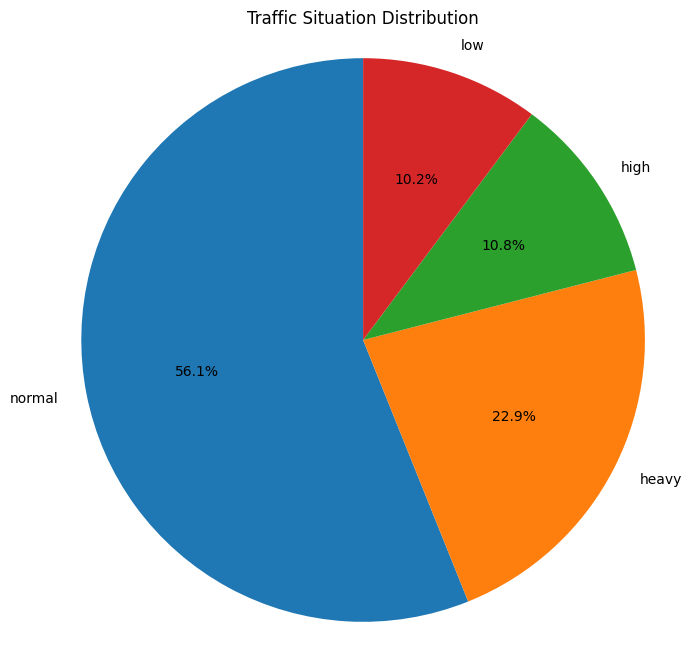

In [15]:
# prompt: buatkan pie chart untuk Traffic Situation

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a column 'Traffic Situation'
traffic_counts = df['Traffic Situation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Traffic Situation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [18]:
ds = df.isin([np.inf, -np.inf])
print(df['Traffic Situation'][ds['Traffic Situation']])

Series([], Name: Traffic Situation, dtype: object)


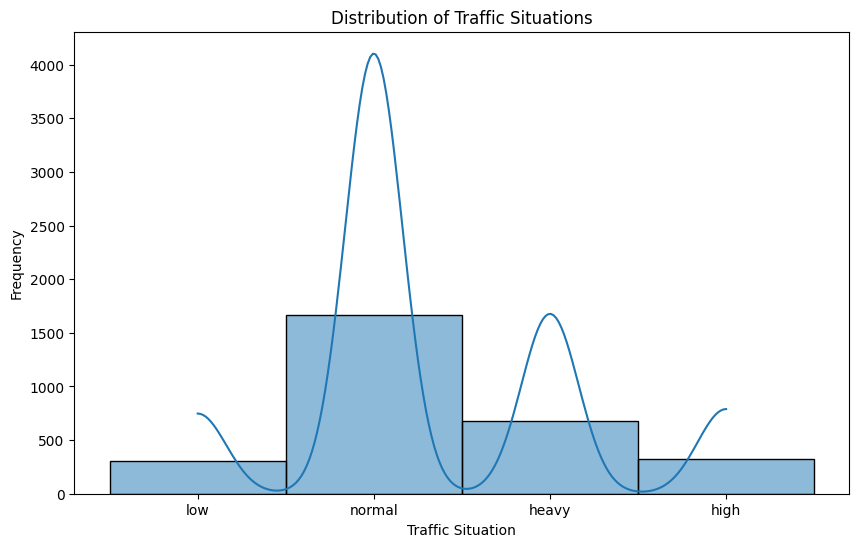

In [19]:
# prompt: buatkan histogram

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Traffic Situation'], kde=True)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Frequency')
plt.show()


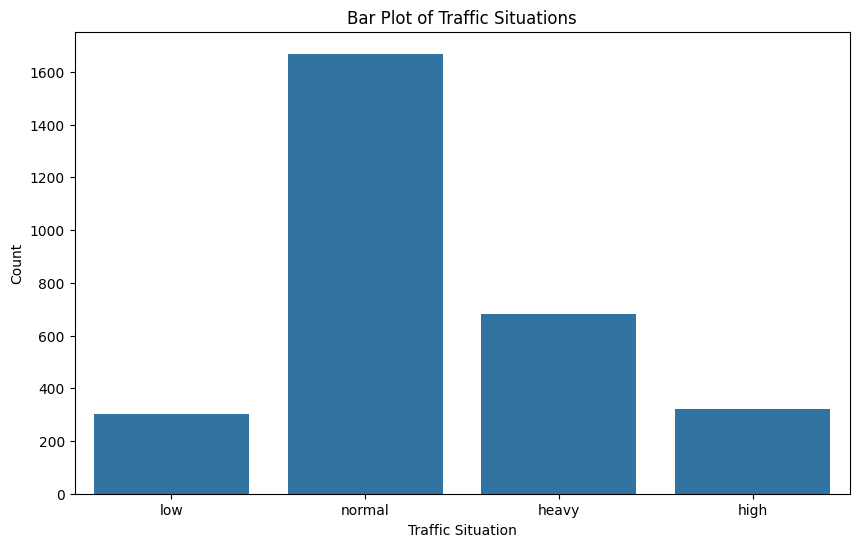

In [22]:
# prompt: buatkan barplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Bar Plot of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


# Data Preparation

In [20]:
# pisahkan fitur dan target
X = df.drop(columns=["Traffic Situation", "Time", "Date"])
y = df["Traffic Situation"] # Replace 'data type' with the correct column name

In [21]:
# ----> Convert 'Day of the week' to numerical representation using one-hot encoding ---
X = pd.get_dummies(X, columns=['Day of the week'], drop_first=True)

In [23]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [24]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# ----> Split the data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


# Modeling

In [26]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])


In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,004 (46.89 KB)

 Trainable params: 12,004 (46.89 KB)

 Non-trainable params: 0 (0.00 B)

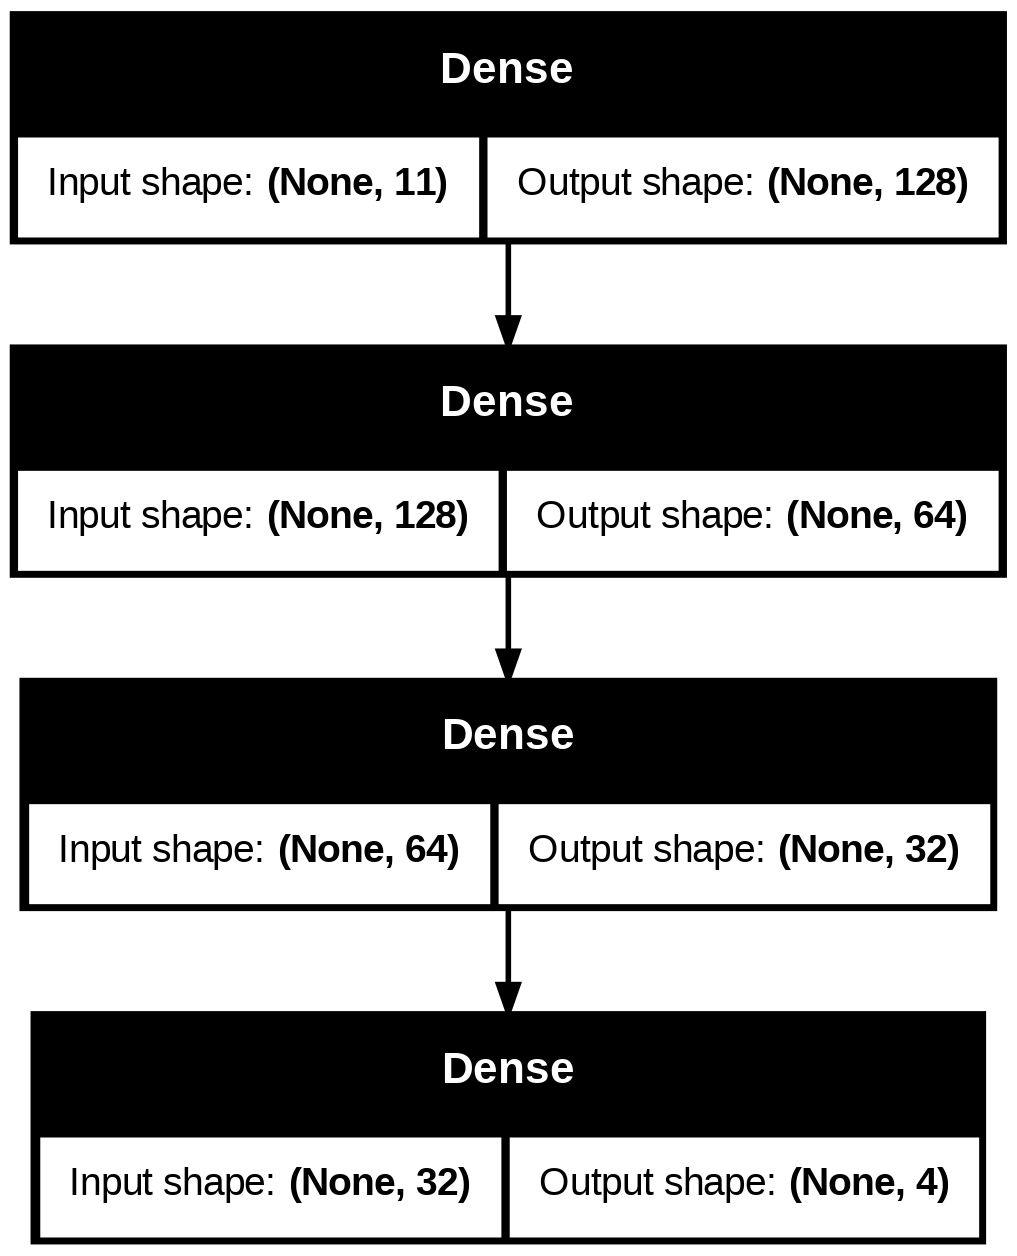

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)


In [30]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))


Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6224 - loss: 1.0520 - val_accuracy: 0.7433 - val_loss: 0.6490
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.5664 - val_accuracy: 0.8389 - val_loss: 0.4278
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8754 - loss: 0.3402 - val_accuracy: 0.8591 - val_loss: 0.3533
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.2929 - val_accuracy: 0.9077 - val_loss: 0.2670
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8949 - loss: 0.2673 - val_accuracy: 0.9128 - val_loss: 0.2619
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9177 - loss: 0.2176 - val_accuracy: 0.9027 - val_loss: 0.2648
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.2140 - val_accuracy: 0.9195 - val_loss: 0.2405
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9209 - loss: 0.2123 - val_accuracy: 0.

# Evaluation

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9556 - loss: 0.1249 
Akurasi Model: 0.9547
Loss Model: 0.1383


In [32]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

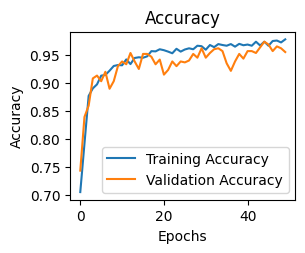

In [33]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

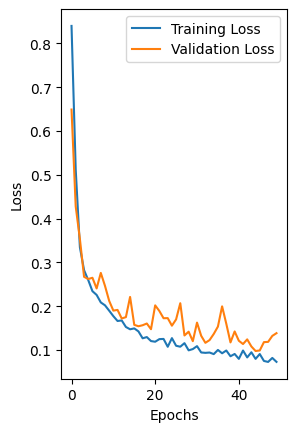

In [34]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


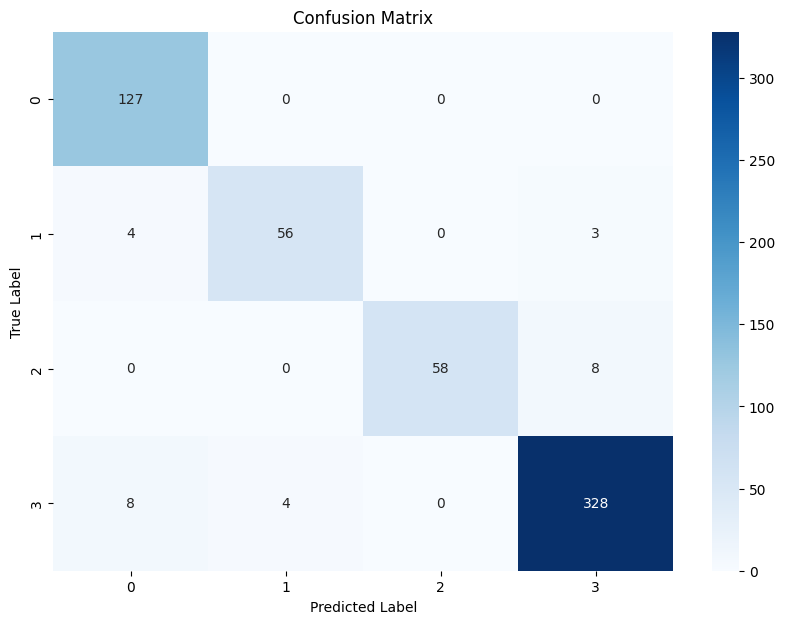

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       127
           1       0.93      0.89      0.91        63
           2       1.00      0.88      0.94        66
           3       0.97      0.96      0.97       340

    accuracy                           0.95       596
   macro avg       0.95      0.93      0.94       596
weighted avg       0.96      0.95      0.95       596



In [35]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [36]:
original_columns = ['Vehicles', 'Junction', 'ID', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Day of the week_Monday', 'Day of the week_Saturday', 'Day of the week_Sunday', 'Day of the week_Thursday', 'Day of the week_Tuesday', 'Day of the week_Wednesday']

sample_input_data = {
    'Vehicles': [78],
    'Junction': [42],
    'ID': [42],
    'Temperature': [20.13],
    'Humidity': [81.60],
    'Wind speed': [7.62],
    'Visibility': [262.71],
    'Day of the week_Monday': [0],  # Assuming this is the encoding for your day
    'Day of the week_Saturday': [0],
    'Day of the week_Sunday': [0],
    'Day of the week_Thursday': [0],  # Add or remove these columns as needed to fit your encoding
    'Day of the week_Tuesday': [0],
    'Day of the week_Wednesday': [0]
}

sample_input_df = pd.DataFrame(sample_input_data, columns=original_columns) # Create DataFrame with columns in the correct order


## Save Model

In [37]:
# ... (kode sebelumnya) ...

# Save Model
model.save('traffic-prediction-dataset.h5')  # Menyimpan model dalam format .h5

# ... (kode selanjutnya) ...

In [38]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model ke file .tflite
with open('traffic-prediction-dataset.tflite', 'wb') as f:  # Changed file name to 'traffic-prediction-dataset.tflite'
    f.write(tflite_model)

Saved artifact at '/tmp/tmpe71_hpdp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132096136612944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096141538704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096136614096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096136614480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096136613904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096136612368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096136615056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132096136614672: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [39]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']